<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично, Резеда! Ты здорово поработала над комментариями и теперь твой проект принят.
    
Спасибо за работу и успехов в следующих проектах!)

<div style="border:solid green 2px; padding: 20px">
<b>Резеда, привет!</b>

Меня зовут Михаленко Дмитрий, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделала большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Принятие решений в бизнесе

**Объект исследования** -  крупный интернет-магазин

**Цель исследования** - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

План исследования:
- Загрузка данных
- Предобработка данных:
    - проверка на пропуски
    - проверка на дубликаты
    - проверка на нужный тип данных
- Приотиризация гипотез
    - применим метод ICE
    - применим метод RICE
- А/В тест
    - построим график кумулятивной выручки по группам
    - построим график кумулятивного среднего чека по группам
    - визулизируем отношение чеков группы А к группе В
    - построим график кумулятивного среднего количества заказов на посетителя по группам
    - построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
    - точечный график количества заказов на пользователя
    - Точечный график количества заказов 
    - найдем границы для определения аномальных заказов
    - вычислим 95-й и 99-й прецентели
    - найдем статистическую значимость
    - проведем проверку гипотез
- Общий вывод

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Коротко обозначила основную цель и план проекта </div>

**ЗАГРУЗКА ДАННЫХ**

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [3]:
display(data.head(10))
display(orders.head(10))
display(visitors.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


    По выведенным таблицам сразу можем заметить, что нименования столбцоы некорректные. Далее приведем их к нижнему регистру и добавим нижнее подчеркивание в столбцах с id.

In [4]:
#приводим наименования столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [5]:
list(data)

['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [6]:
#переименовываем столбцы в таблице orders
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True )

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Не забываем про змеиный стиль </div>

In [7]:
list(orders)

['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


    Столбцы с датами приведем к типу datetime, остальные столбцы имеют подходящий тип данных

In [11]:
#приводим столбцы к типу datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И приводим даты к подходящему формату данных </div>

In [12]:
display(data.isna().sum())
display(orders.isna().sum())
display(visitors.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [13]:
display(data.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Пропуски и дубликаты также проверены </div>

    Проверили данные на пропуски, дубликаты и типы данных. Пропуски и дубликаты отсутствуют, поэтому ничего менять не нужно. В таблицах с постетителями и заказами привели столбце с датой к типу datetime. Наименование столбцов привели к нижнему    регистру, в таблице с заказами переимновали столбцы.

**ПРИОРИТИЗАЦИЯ ГИПОТЕЗ**

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Здесь хорошо было бы отобразить названия гипотез целиком, например так: pd.options.display.max_colwidth = 100

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично!

In [14]:
pd.options.display.max_colwidth = 100

In [15]:
#метод ICE
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
print(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                            hypothesis  \
8                                              Запустить акцию, дающую скидку на товар в день рождения   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главн

    По методу ICE в первую тройку гипотез попадают:
    -Запустить акцию, дающую скидку на товар в день рождения
    -Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    -Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> В целом верно, но тут значения в ICE вполне можно округлить до второго знака и написать сами названия гипотез, а не их индексы

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> В выводах указали гипотезы

In [16]:
#метод RICE
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
print(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))
data

                                                                                            hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


        Лидеры по методу RICE:
        -Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 
        -Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию
        -Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
        
        
        Приоритет гипотез немного сменился, гипотеза "Запустить акцию, дающую скидку на товар в день рождения" опустилась   ниже, скорее в силу своего охвата, который равняется одному, у гипотез, которые попали в тройку при методе RICE охваты   выше.

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>  Тут также лучше например вместо гипотезы 7 - вывести ее название. Поскольку 7 - это не номер гипотезы - это ее индекс. У "коллег", все может быть иначе, например список в Ноушен с другой сортировкой, поэтому аналитик должен дать универсальный вывод.


<div class="alert alert-info"> <b>Комментарий студента:</b> спасибо за полезную опцию! 
Индексы гипотез заменила на сами гипотезы) </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Рад помочь)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По самим же расчетам и описанию все абсолютно верно, молодец что указала Reach (охват) как основную причину отличия фремворков </div>

**АНАЛИЗ А/В ТЕСТА**

- Построим график кумулятивной выручки по группам.

In [17]:
#создадим массив уникальных пар
datesGroups = orders[['date','group']].drop_duplicates() 

In [18]:
#создаем аггрегирующую таблицу с заказами
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [19]:
ordersAggregated 

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [20]:
#создаем агрегирующую таблицу с посетителями
visitorsAggregated = datesGroups.apply(
    lambda x:visitors[
        np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg(
    {
        'date': 'max',
        'group': 'max',
        'visitors': 'sum'
    }),
axis=1).sort_values(by=['date', 'group'])

In [21]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [22]:
# создаем переменную с покупателями, которые попали в обе группы
visits = orders.loc[orders['visitor_id']
                    .isin(orders[orders['group']=='A']['visitor_id'])& orders['visitor_id']
                    .isin(orders[orders['group']=='B']['visitor_id']),'visitor_id'].unique()

In [23]:
#проверяем сколько покупателей было изначально
(orders.groupby('visitor_id')['group'].nunique()).count()

1031

In [24]:
# смотрим, сколько покупателей без тех, кто попал в обе группы
orders = orders.loc[~orders['visitor_id'].isin(visits)]
(orders.groupby('visitor_id')['group'].nunique()).count()

973

    Проверили, были ли пользователи, попавшие в обе группы, убедились, что такие имеются и их число равно 58 
    Сохранили данные, без этого числа пользователей.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Уникальные пары сформированы, получены агрегированные данные, молодец!</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но также здесь необходимо проверить и описать, не попадают ли какие-то пользователи в обе группы - по таблице с заказами. Мы здесь можем проверить только пересечния именно по покупателям, поскольку данные с визитами уже представлены агрегированными </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправила! Проверила, есть ли пользователи попавшие в обе группы </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Проверка выполнена корректно. На самом деле чаще всего при проведении A/B тестов при таких довольно небольших пересечения принимают решение оставить этих пользователей как есть, но впрочем их удаление тоже не ошибка

In [25]:
#объединим две таблицы и переименуем столбцы
cumulative = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulative.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulative.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


In [26]:
#добавим столбец с конверсией
cumulative['conversion'] = (
    cumulative['orders'] / cumulative['visitors']
)

cumulativeA = cumulative[cumulative['group']=='A']
cumulativeB = cumulative[cumulative['group']=='B']

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulative[cumulative['group']=='A'][['date','revenue', 'orders','visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulative[cumulative['group']=='B'][['date','revenue', 'orders','visitors']]

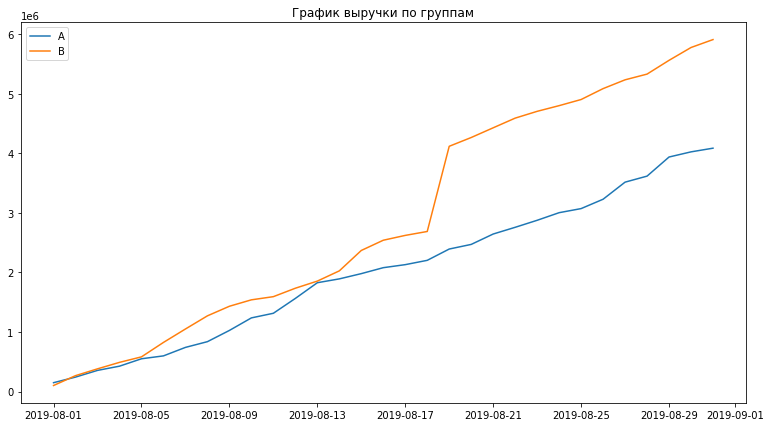

In [28]:
# строим график выручки группы А
plt.subplots(figsize=(13, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График выручки по группам')
plt.legend();

    Выручка группы В стабильно выше и после 17 августа группа В сильно уходит в отрыв, стремясь вверх. У группы А выручки     растут более плавно. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Аномалия хорошо зафиксирована, только можно еще сразу указать ее возможную причину</div>

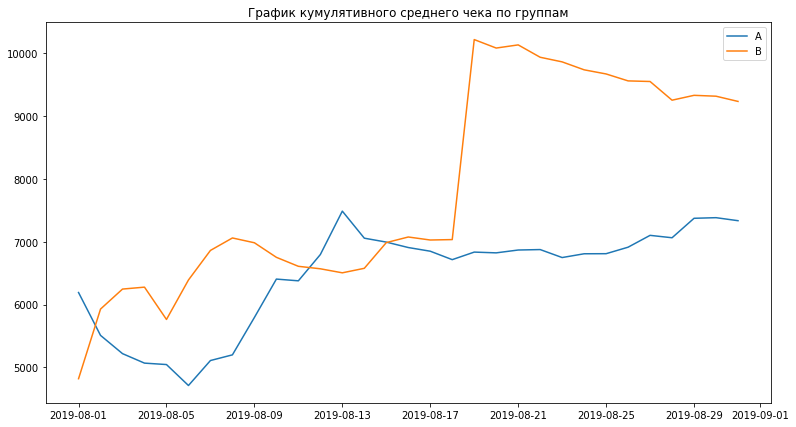

In [29]:
#строим график кумулятивного среднего чека по группам
plt.subplots(figsize=(13, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

    У группы В наблюдаются сильно резкий скачет ввверх между 17.08 и 21.08, скорее там присутствуют аномальные значение в   виде крупного заказа. У группы А так же наблюдаются скачки, но не такие значительные.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Вполне логично. Очевидно, здесь есть влияние выбросов</div>

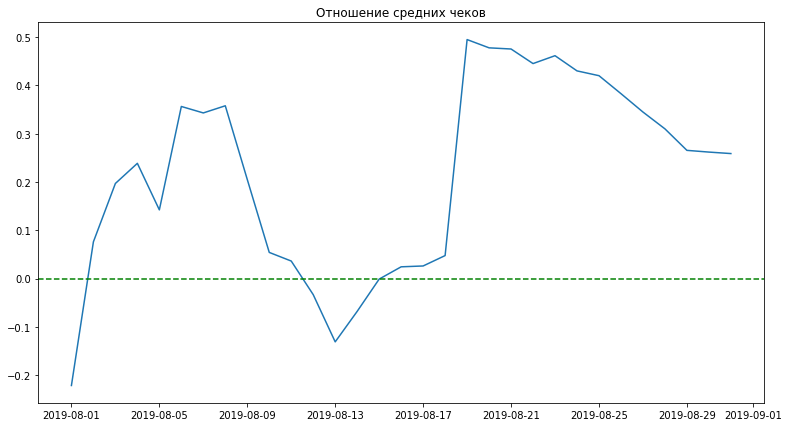

In [30]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', \
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.subplots(figsize=(13, 7))
plt.title('Отношение средних чеков')
plt.plot(mergedCumulativeRevenue['date'], 
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='green', linestyle='--');

    График резко скачет, что может указывать на наличие выбросов и крупных заказов, рассмотрим это детальнее.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично, отдельно отмечу отображение оси X, она повышает наглядность</div>

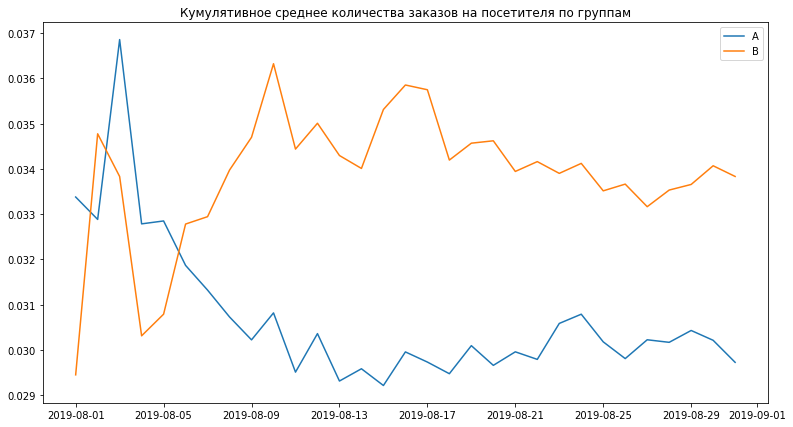

In [31]:
#график кумулятивного среднего количества заказов на посетителя по группам
plt.subplots(figsize=(13, 7))
plt.plot(cumulativeA['date'], cumulativeA['conversion'], label='A')
plt.plot(cumulativeB['date'], cumulativeB['conversion'], label='B')
plt.title('Кумулятивное среднее количества заказов на посетителя по группам')
plt.legend();

    У каждой группы получились очень ломкие графики, в начале теста у них слуился резкий скачет и тут же спад, что скорее всего там был крупный заказ у каждрй их групп. Далее группа В лидиурет на протяжении всего теста.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Согласен, В почти все время была выше</div>

In [32]:
mergedCumulativeConversions = cumulativeA[['date','conversion']].merge(cumulativeB[['date','conversion']], \
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

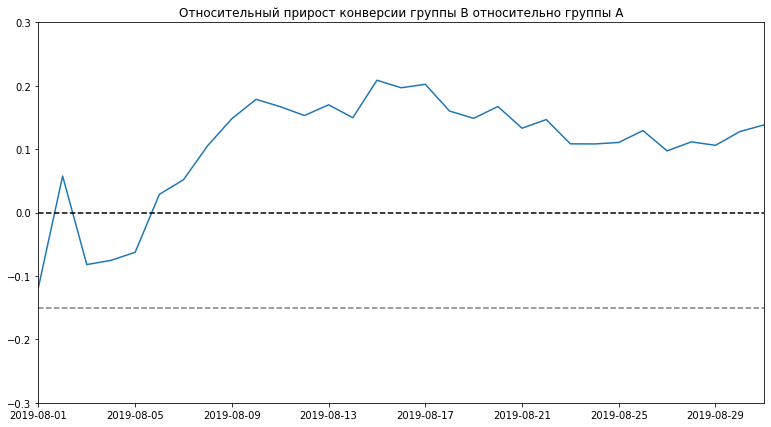

In [33]:
#график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.subplots(figsize=(13, 7))
plt.plot(mergedCumulativeConversions['date'],
mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1) 
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axis(xmin=mergedCumulativeConversions['date'].min(), xmax=mergedCumulativeConversions['date'].max(), ymin=-0.30, ymax=0.3)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.15, color='grey', linestyle='--');

    Исходя из графика можем заметить, что группа В сейчас существенно обгоняет группу А, разница практически в 20%.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Здорово, также удобные для восприятия горизонтальные линии</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В этой части ты здорово разобралась с кумулятивными метриками - их расчетом и интерпретацией; действительно, нам нужно проверить данные на аномальные значения (кстати, в реальных проектах рекомендую проверять аномалии на стадии знакомства с данными - это позволит избежать невынужденных ошибок при их изучении).</div>

In [34]:
#создадим таблицу с количеством заказов по пользователям
users_orders = (orders.groupby('visitor_id')['revenue'].count()
                   .reset_index())

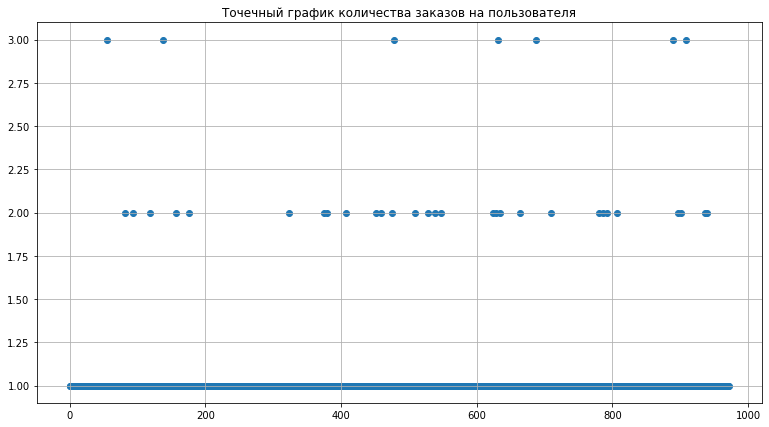

In [35]:
#строим точечный график по этой таблице
x_values = pd.Series(range(0,len(users_orders['revenue']))) 
plt.figure(figsize=(13, 7))
plt.scatter(data=users_orders, x=x_values, y='revenue') 
plt.grid()
plt.title('Точечный график количества заказов на пользователя');

    Исходя из графика, можем сделать вывод, что больше двух заказов на одного пользователя - много. Уберем таких    
    пользователей.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Совершенно верно, и перцентили тут помогут для более точного расчета</div>

In [36]:
# вычисляем 95 и 99 перцентили
print(np.percentile(users_orders['revenue'], [95, 99]))

[1. 2.]


    5% пользователей совершили два заказа и не более 1% совершили больше, удалим тех, кто совершил 4 и более заказов.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Корректная интерпретация, остановимся на 4 заказах</div>

In [37]:
per99 = np.percentile(users_orders['revenue'],[99])[0]
users_orders99 = users_orders.query('revenue <= @per99')

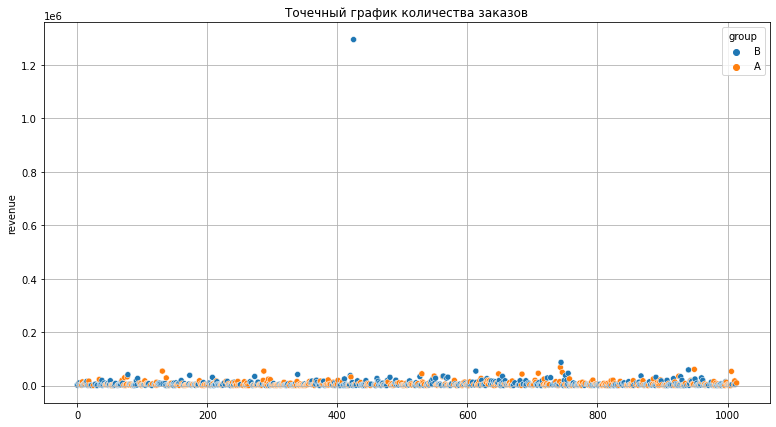

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(13, 7))
sns.scatterplot(x=x_values, y="revenue", hue="group", data=orders)
plt.grid()
plt.title('Точечный график количества заказов'); 

    У группы В имеются аномально крупные заказы, они и влияют на увеличение среднего чека этой группы. Удалим их.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, тут есть аномалии</div>

In [39]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


    Границей для аномальных значений выберем все, что больше 28000, соответсвенно удалим 99 прецентиль.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Вполне оправданно, тоже остановимся на 99 перцентиле</div>

In [40]:
per_orders99 = np.percentile(orders['revenue'],[99])[0]
orders99 = orders.query('revenue <= @per_orders99')

In [41]:
#Создадим очищенную таблицу,без аномальных значений
data_clean = orders99.loc[orders99['visitor_id'].isin(users_orders99['visitor_id'])]
data_clean

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


**СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ**

    Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.
    Сначала подготовим наши данные к тесту, определим уровень стат. значимости - 0.05.
    
  

In [42]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [43]:
#объявим переменные с заказами по каждой группе
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

    ПРОВЕРКА ГИПОТЕЗ ПО "СЫРЫМ" ДАННЫМ

**H0**: статистически значимых различий в среднем числе заказов между группами нет

**H1**: статистически значимые различия в среднем числе заказов между группами есть

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Гипотезы для проверки сформулированы.
</div>

In [44]:
#объявим пременные, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
    .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
    .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [45]:
alpha = 0.05
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print("P-value: {0:.3f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(sampleB.mean() / sampleA.mean()-1))

P-value: 0.011
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.980%


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И данные на выходе расчетво тоже подписываешь</div>

In [46]:
print('Среднее количество заказов (сырой) группы А: {:.3f}'.format(sampleA.mean()))
print('Среднее количество заказов (сырой) группы B: {:.3f}'.format(sampleB.mean()))

Среднее количество заказов (сырой) группы А: 0.025
Среднее количество заказов (сырой) группы B: 0.029


    По проведенному тесту, отвергаем нулевую гипотезу об отсутствии различий в среднем числе заказов между группами.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Сам тест проводишь как надо, хорошо</div>

**H0**: различий в среднем чеке между группами нет. 

**H1**: различия в среднем чеке между группами есть. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И гипотезы при начале проверки подписаны</div>

In [47]:
alpha = 0.05
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print("P-value: {0:.3f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(orders[orders['group']=='B']['revenue']
.mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 28.660%


In [48]:
print('Средний чек (сырой) группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек (сырой) группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))

Средний чек (сырой) группы А: 7189.44
Средний чек (сырой) группы B: 9249.95


    P-value больше 0.05, значит мы не можем отвергать нулевую гипотезу о равенстве средних чеков между группами.
    Несмотря на то, что разница в средних чеках равна двум тысячам, тест не отвергает нулевую гипотезу. Скорее всего эта    разница статистически не значима.

<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера ❌:</b> Резеда, обрати, пожалуйста, внимание на выводы: `P-value значительно больше 0.05. Значит, мы не можем отвергать нулевую гипотезу о равенстве средних чеков между         группами` - тут вывод верный, но мы не знаем, значительно больше p-value или нет, оно просто больше, т.е. корректнее писать `P-value 0.729 больше 0.05, значит...`. Мы ведь фактически не можем сказать с какого момента настало это "значительно"
    
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо, поняла! Вывод подкорректировала. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Формулировку вывода поправили



    ПРОВЕРКА ГИПОТЕЗ ПО "ОЧИЩЕННЫМ" ДАННЫМ
    Используем аналогичный код, что и для таблиц с сырыми данными.

In [49]:
#объявим переменные с заказами по каждой группе
clean_ordersByUsersA = (
    data_clean[data_clean['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
clean_ordersByUsersA.columns = ['user_id', 'orders']

clean_ordersByUsersB = (
    data_clean[data_clean['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
clean_ordersByUsersB.columns = ['user_id', 'orders'] 

In [50]:
#объявим пременные, в которых пользователям из разных групп будет соответствовать количество заказов
clean_sampleA = pd.concat(
    [clean_ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors']
.sum() - len(clean_ordersByUsersA['orders'])), name='orders')],axis=0)
     
clean_sampleB = pd.concat(
    [clean_ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors']
.sum() - len(clean_ordersByUsersB['orders'])), name='orders')],axis=0)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично установлены фильтры, молодец</div>

**H0**: статистически значимых различий в среднем числе заказов между группами нет

**H1**: статистически значимые различия в среднем числе заказов между группами есть

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И гипотезы также указаны</div>

In [51]:
alpha = 0.05
p_value = stats.mannwhitneyu(clean_sampleA, clean_sampleB)[1]
print("P-value: {0:.3f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(clean_sampleB.mean() / clean_sampleA.mean()-1))

P-value: 0.007
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 18.947%


In [52]:
print('Среднее количество заказов (очищенной) группы А: {:.3f}'.format(clean_sampleA.mean()))
print('Среднее количество заказов (очищенной) группы B: {:.3f}'.format(clean_sampleB.mean()))

Среднее количество заказов (очищенной) группы А: 0.024
Среднее количество заказов (очищенной) группы B: 0.028


    Даже с очищенными данными ситуация практически такая же. p-value больше уровня значимости, значит мы отверагем нулевую  гипотезу, что группы равны.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По выводу также все абсолютно корректно</div>

**H0**: различий в среднем чеке между группами нет. 

**H1**: различия в среднем чеке между группами есть. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В 4й раз гипотезы сформулированы</div>

In [53]:
alpha = 0.05
p_value = stats.mannwhitneyu(data_clean[data_clean['group']=='A']['revenue'], data_clean[data_clean['group']=='B']['revenue'])[1]
print("P-value: {0:.3f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(data_clean[data_clean['group']=='B']['revenue']
.mean()/data_clean[data_clean['group']=='A']['revenue'].mean()-1))

P-value: 0.788
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -3.234%


In [54]:
print('Средний чек (очищенный) группы А: {:.2f}'.format(data_clean[data_clean['group']=='A']['revenue'].mean()))
print('Средний чек (очищенный) группы B: {:.2f}'.format(data_clean[data_clean['group']=='B']['revenue'].mean()))

Средний чек (очищенный) группы А: 6487.02
Средний чек (очищенный) группы B: 6277.27


    На очищенных данных средние чеки практически сравнялись, тест так же не отвергает нулевую гипотезу о равенстве данных   групп

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И здесь по выводу также никаких замечаний</div>

    Вывод по проделанному тесту:
    - Отвергнули гипотезу о равенстве среднего количества заказов между группами, тесты с "сырыми" и "очищенными" данными   показали практический одинаковый результат
    - Ни в одном из тестов не получилось отвергнуть гипотезу о равенстве средних чеков между группами

# Общий вывод

В ходе исследования интернет-магазина, была проведена приоритизация гипотез, так же провели А/В тест.
Исходя из исследования, можем сделать следующие выводы, так же дать некоторые рекомендации.

**Приоритизация гипотез**

    В первую очередь стоит обратить внимание на следующие гипотезы:
    - Запустить акцию, дающую скидку на товар в день рождения
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    
    Если необходимо учитывать охват пользователей, то рекомендуется расположить гипотеза таким образом:
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    
**Анализ А/В теста**

Тесты по "сырым" и "очищенным" данным показали, что:

    - относительный прирост среднего числа заказов группы В к группе А равен 15-25%
    - отвергнули гипотезу о равнестве среднего числа заказов между группами
    - оба теста не отвергли гипотезу о равенстве средних чеков
    
Конверсия группы В больше, чем у группы А, но так же они имеют практически одинаковый средний чек.

Принимаем решение остановить тест и признать победу группы В, так как ее показатели лучше группы А.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Общий вывод сформулирован классно. Все по пунктам и есть решение по самому результату проведения</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Резеда, проект отличный! У тебя сильные аналитические навыки, владение инструментами для проведения исследования, понимание статистики и навыки продуктовой аналитики. Но всё же в проекте есть несколько замечаний и я попрошу тебя исправить их, чтобы проект стал еще лучше! </div>